In [1]:
# Importing dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
training_features = pd.read_csv('train_features_clean.csv',parse_dates = ['week_start_date'], index_col = 'week_start_date')
training_labels = pd.read_csv('training_labels_clean.csv',parse_dates = ['week_start_date'], index_col = 'week_start_date')
test_features = pd.read_csv('test_features_clean.csv',parse_dates = ['week_start_date'], index_col = 'week_start_date') 

In [3]:
training_features.head()

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
week_start_date,,,,,,,,,,,,,,,,,,,,,
1990-04-30,sj,1990,18,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1990-05-07,sj,1990,19,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
1990-05-14,sj,1990,20,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
1990-05-21,sj,1990,21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
1990-05-28,sj,1990,22,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [4]:
training_features.describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
count,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,...,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000
mean,2001.099024,26.247559,0.140677,0.130362,0.203783,0.202305,45.907755,298.697611,299.226215,295.246460,...,40.190000,82.176087,45.907755,16.747338,4.925633,27.189444,8.048328,32.454672,22.095119,39.201255
std,5.389759,14.903343,0.131901,0.118744,0.073860,0.083903,43.693581,1.364252,1.264269,1.531866,...,43.528511,7.160416,43.693581,1.546393,3.552211,1.279610,2.112631,1.954045,1.571849,47.381152
min,1990.000000,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,...,0.000000,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000
25%,1997.000000,13.000000,0.054325,0.050908,0.155087,0.144209,9.962500,297.652500,298.257143,294.116429,...,13.125000,77.207857,9.962500,15.552500,2.342857,26.328571,6.528571,31.100000,21.100000,8.750000
50%,2002.000000,26.000000,0.128817,0.121429,0.196050,0.189450,38.515000,298.638571,299.292857,295.641429,...,27.200000,80.337143,38.515000,17.088571,2.871429,27.417143,7.300000,32.800000,22.200000,23.800000
75%,2005.000000,39.000000,0.231796,0.213989,0.248846,0.246982,70.242500,299.830714,300.207143,296.468571,...,52.425000,86.495357,70.242500,17.982857,7.678571,28.128571,9.537500,33.900000,23.300000,53.600000
max,2010.000000,52.000000,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,...,570.500000,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000


In [4]:
training_labels.head()

,Unnamed: 0,city,year,weekofyear,total_cases
week_start_date,,,,,
1990-04-30,0,sj,1990,18,4
1990-05-07,1,sj,1990,19,5
1990-05-14,2,sj,1990,20,4
1990-05-21,3,sj,1990,21,3
1990-05-28,4,sj,1990,22,6


In [4]:
training_labels=training_labels.iloc[:,1:5]

In [5]:
print(training_features.shape)
print(training_labels.shape)
print(test_features.shape)

(1434, 23)
(1434, 4)
(416, 23)


In [14]:
training_features.head()

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,reanalysis_air_temp_k_log
week_start_date,,,,,,,,,,,,,,,,,,,,,
1990-04-30,sj,1990,18,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,5.695659
1990-05-07,sj,1990,19,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5.697803
1990-05-14,sj,1990,20,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,5.699712
1990-05-21,sj,1990,21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,5.700401
1990-05-28,sj,1990,22,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,5.702176


In [9]:
training_features.isnull().any(axis=0)

city                                     False
year                                     False
weekofyear                               False
week_start_date                          False
ndvi_ne                                  False
ndvi_nw                                  False
ndvi_se                                  False
ndvi_sw                                  False
precipitation_amt_mm                     False
reanalysis_air_temp_k                    False
reanalysis_avg_temp_k                    False
reanalysis_dew_point_temp_k              False
reanalysis_max_air_temp_k                False
reanalysis_min_air_temp_k                False
reanalysis_precip_amt_kg_per_m2          False
reanalysis_relative_humidity_percent     False
reanalysis_sat_precip_amt_mm             False
reanalysis_specific_humidity_g_per_kg    False
reanalysis_tdtr_k                        False
station_avg_temp_c                       False
station_diur_temp_rng_c                  False
station_max_t

In [10]:
training_labels.isnull().any(axis=0)

city           False
year           False
weekofyear     False
total_cases    False
dtype: bool

In [11]:
test_features.isnull().any(axis=0)

city                                     False
year                                     False
weekofyear                               False
week_start_date                          False
ndvi_ne                                  False
ndvi_nw                                  False
ndvi_se                                  False
ndvi_sw                                  False
precipitation_amt_mm                     False
reanalysis_air_temp_k                    False
reanalysis_avg_temp_k                    False
reanalysis_dew_point_temp_k              False
reanalysis_max_air_temp_k                False
reanalysis_min_air_temp_k                False
reanalysis_precip_amt_kg_per_m2          False
reanalysis_relative_humidity_percent     False
reanalysis_sat_precip_amt_mm             False
reanalysis_specific_humidity_g_per_kg    False
reanalysis_tdtr_k                        False
station_avg_temp_c                       False
station_diur_temp_rng_c                  False
station_max_t

In [46]:
training_labels.tail()

,city,year,weekofyear,total_cases,log total cases,log_total_cases
week_start_date,,,,,,
2010-05-28,iq,2010,21,5,1.609438,1.609438
2010-06-04,iq,2010,22,8,2.079442,2.079442
2010-06-11,iq,2010,23,1,0.000000,0.000000
2010-06-18,iq,2010,24,1,0.000000,0.000000
2010-06-25,iq,2010,25,4,1.386294,1.386294


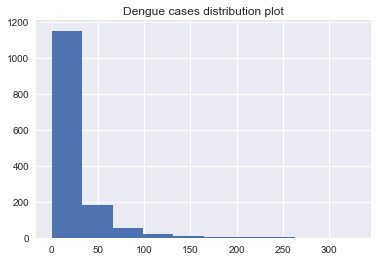

In [25]:
# distribution of dengue total_cases
plt.hist(training_labels['total_cases'])
plt.title('Dengue cases distribution plot')
plt.show()

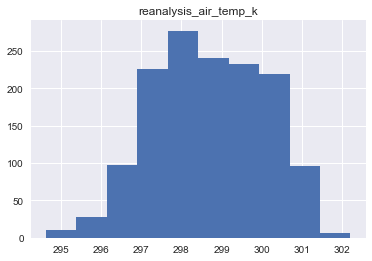

In [5]:
plt.hist(training_features['reanalysis_air_temp_k'])
plt.title('reanalysis_air_temp_k')
plt.show()

In [6]:
training_features['reanalysis_air_temp_k_log'] = np.log(training_features.reanalysis_air_temp_k)

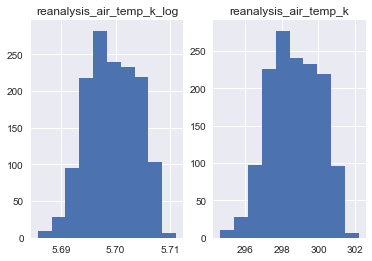

In [10]:
plt.subplot(121)
plt.hist(training_features['reanalysis_air_temp_k_log'])
plt.title('reanalysis_air_temp_k_log')
plt.subplot(122)
plt.hist(training_features['reanalysis_air_temp_k'])
plt.title('reanalysis_air_temp_k')
plt.show()

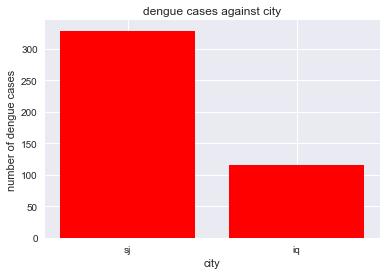

In [7]:
# city with high number of dengue cases
plt.bar(training_labels['city'],training_labels['total_cases'],color = '')
plt.title('dengue cases against city')
plt.xlabel('city')
plt.ylabel('number of dengue cases')
plt.show()

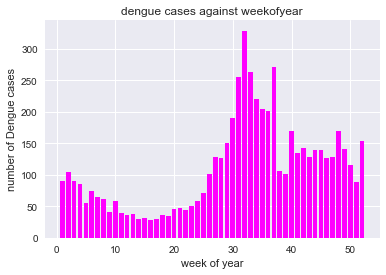

In [8]:
# week of year against dengue cases

plt.bar(training_labels['weekofyear'],training_labels['total_cases'], color = 'magenta')
plt.title('dengue cases against weekofyear')
plt.xlabel('week of year')
plt.ylabel('number of Dengue cases')
plt.show()

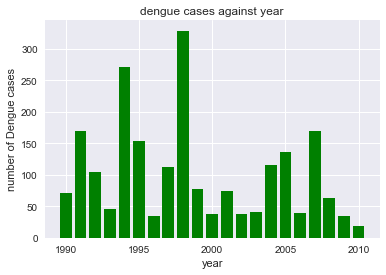

In [19]:
# Relationship between station avg and dengeue disease
plt.bar(training_labels['year'],training_labels['total_cases'], color = 'green')
plt.title('dengue cases against year')
plt.xlabel('year')
plt.ylabel('number of Dengue cases')
plt.show()

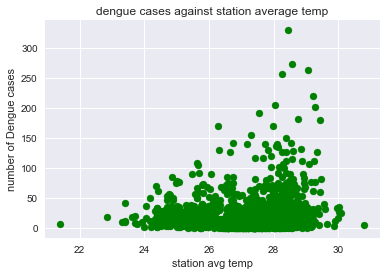

In [26]:
# year against dengue cases
plt.scatter(training_features['station_avg_temp_c'],training_labels['total_cases'], color = 'green')
plt.title('dengue cases against station average temp')
plt.xlabel('station avg temp')
plt.ylabel('number of Dengue cases')
plt.show()

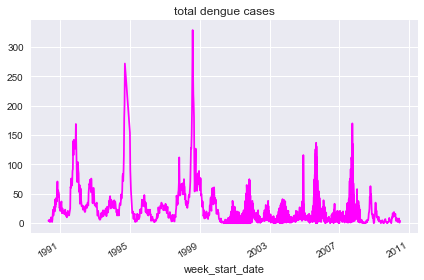

In [7]:
# Time series plot for total dengue cases
training_labels.total_cases.plot(title = 'total dengue cases',color='magenta')
plt.tight_layout()
plt.show()

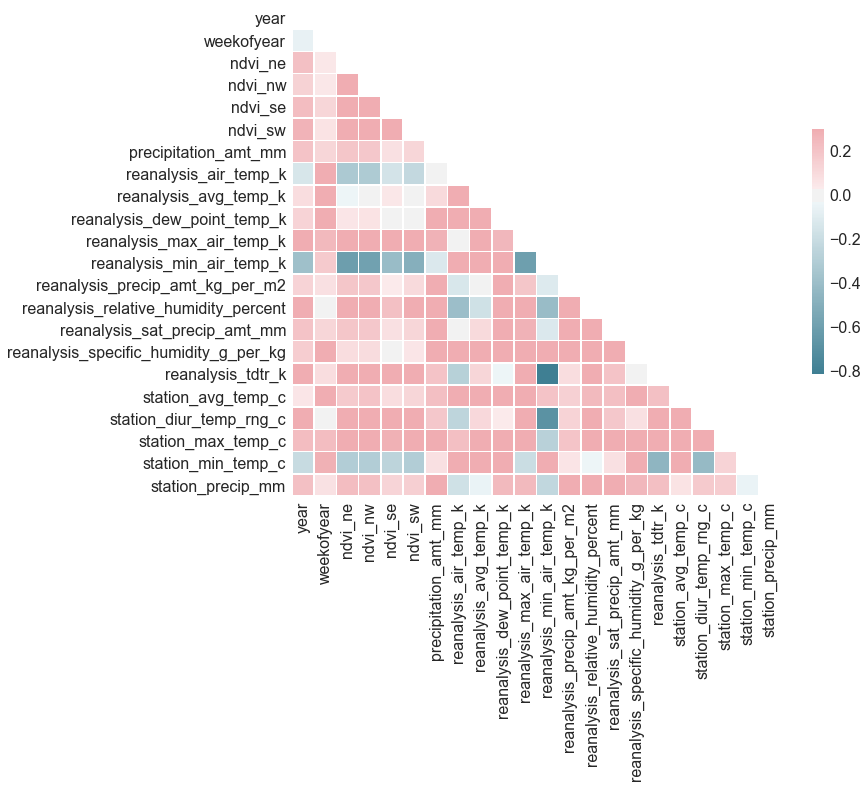

In [40]:
sns.set_style('white')
sns.set_context("paper",font_scale=2)
corr = training_features.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.3, center=0,
           square=True, linewidths=0.5, cbar_kws={"shrink":0.5})

# Modeling

In [9]:
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler

In [5]:
training_features.head()

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
week_start_date,,,,,,,,,,,,,,,,,,,,,
1990-04-30,sj,1990,18,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1990-05-07,sj,1990,19,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
1990-05-14,sj,1990,20,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
1990-05-21,sj,1990,21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
1990-05-28,sj,1990,22,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [7]:
# Dependent and independent variable
X = training_features
y = training_labels['total_cases'].values

In [78]:
# Encoding categorical values
X.city = LabelEncoder().fit_transform(X.city)
X = X.values

In [10]:
# Splitting training and testing set
Xtr,Xtes,ytr,ytes = train_test_split(X,y,test_size = 0.2,random_state = 19961)

# Scaling the dataset
X_scaler = StandardScaler()
Xtr = X_scaler.fit_transform(Xtr)
Xtes= X_scaler.transform(Xtes,ytr,)

In [89]:
# train model
reg = SGDRegressor()
reg.fit(Xtr,ytr)


C:\Users\lenovoG50\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [22]:
y_pred = reg.predict(Xtes)

In [23]:
print('Loss :',mean_squared_error(ytes,y_pred))

Loss : 626.0337087795679


In [97]:
from sklearn.metrics import mean_absolute_error
'''print('Loss :',mean_absolute_error(ytes,y_pred))
print('Accuracy :',cross_val_score(ytes,y_pred))'''

ImportError: cannot import name 'cross_val_score'

In [99]:
from sklearn import linear_model

reg = linear_model.LinearRegression()
cv = ShuffleSplit(n_splits=4, test_size=0.1, random_state=0)
print(cross_val_score(reg, Xtr, np.ravel(ytr), cv=cv))
reg.fit(Xtr, ytr)

[0.09572193 0.21254133 0.22032221 0.23022205]


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)